In [15]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [16]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

In [17]:
train_images.shape

(60000, 28, 28)

In [18]:
train_images = train_images/255.0
test_images = test_images/255.0

In [19]:
class_names = ['Tshirt/Top','Trousers','Pullover','Dress','Coat','Sandals','Shirts','Sneakers','Bag','Ankle Boots']

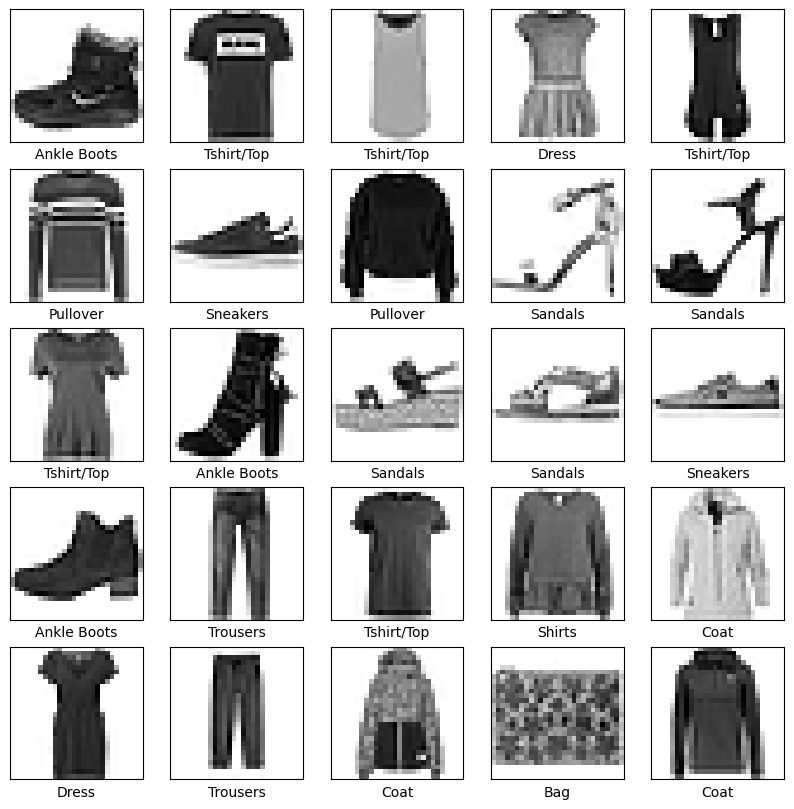

In [20]:
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(train_images[i],cmap = plt.cm.binary)
    
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [28]:
from keras.models import Sequential
from keras.layers import Dense,Flatten, MaxPooling2D, Conv2D

model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10))
# model = tf.keras.Sequential([
#     tf.keras.layers.Flatten(input_shape=(28,28)),
#     tf.keras.layers.Dense(128,activation='relu'),
#     tf.keras.layers.Dense(10)
# ])

model.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 10816)             0         
                                                                 
 dense_10 (Dense)            (None, 128)               1384576   
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                                 
Total params: 1386506 (5.29 MB)
Trainable params: 1386506 (5.29 MB)
Non-trainable params: 0 (0.00 Byte)
_______________

In [29]:
model.fit(train_images,train_labels,epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.3768 - accuracy: 0.8660
Epoch 2/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.2548 - accuracy: 0.9075
Epoch 3/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.2090 - accuracy: 0.9226
Epoch 4/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.1738 - accuracy: 0.9340
Epoch 5/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.1448 - accuracy: 0.9468
Epoch 6/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.1200 - accuracy: 0.9553
Epoch 7/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0998 - accuracy: 0.9633
Epoch 8/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0846 - accuracy: 0.9692
Epoch 9/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0686 - accuracy: 0.9751
Epoch 10/10
1875/1875 [==============================] - 39s 21m

In [31]:
test_loss, test_accuracy = model.evaluate(test_images,test_labels)

print('Accuracy ', test_accuracy)

313/313 [==============================] - 2s 8ms/step - loss: 0.3273 - accuracy: 0.9178
Accuracy  0.9178000092506409


In [34]:
probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])

In [35]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 2s 7ms/step


In [39]:
def plot_images(i,prediction_array,true_label,img):
    true_label,img = true_label[i],img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    prediction_label = np.argmax(prediction_array)
    
    if prediction_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    plt.imshow(img, cmap = plt.cm.binary)

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[prediction_label],
                                        100*np.max(prediction_array),
                                        class_names[true_label]),
                                        color = color)

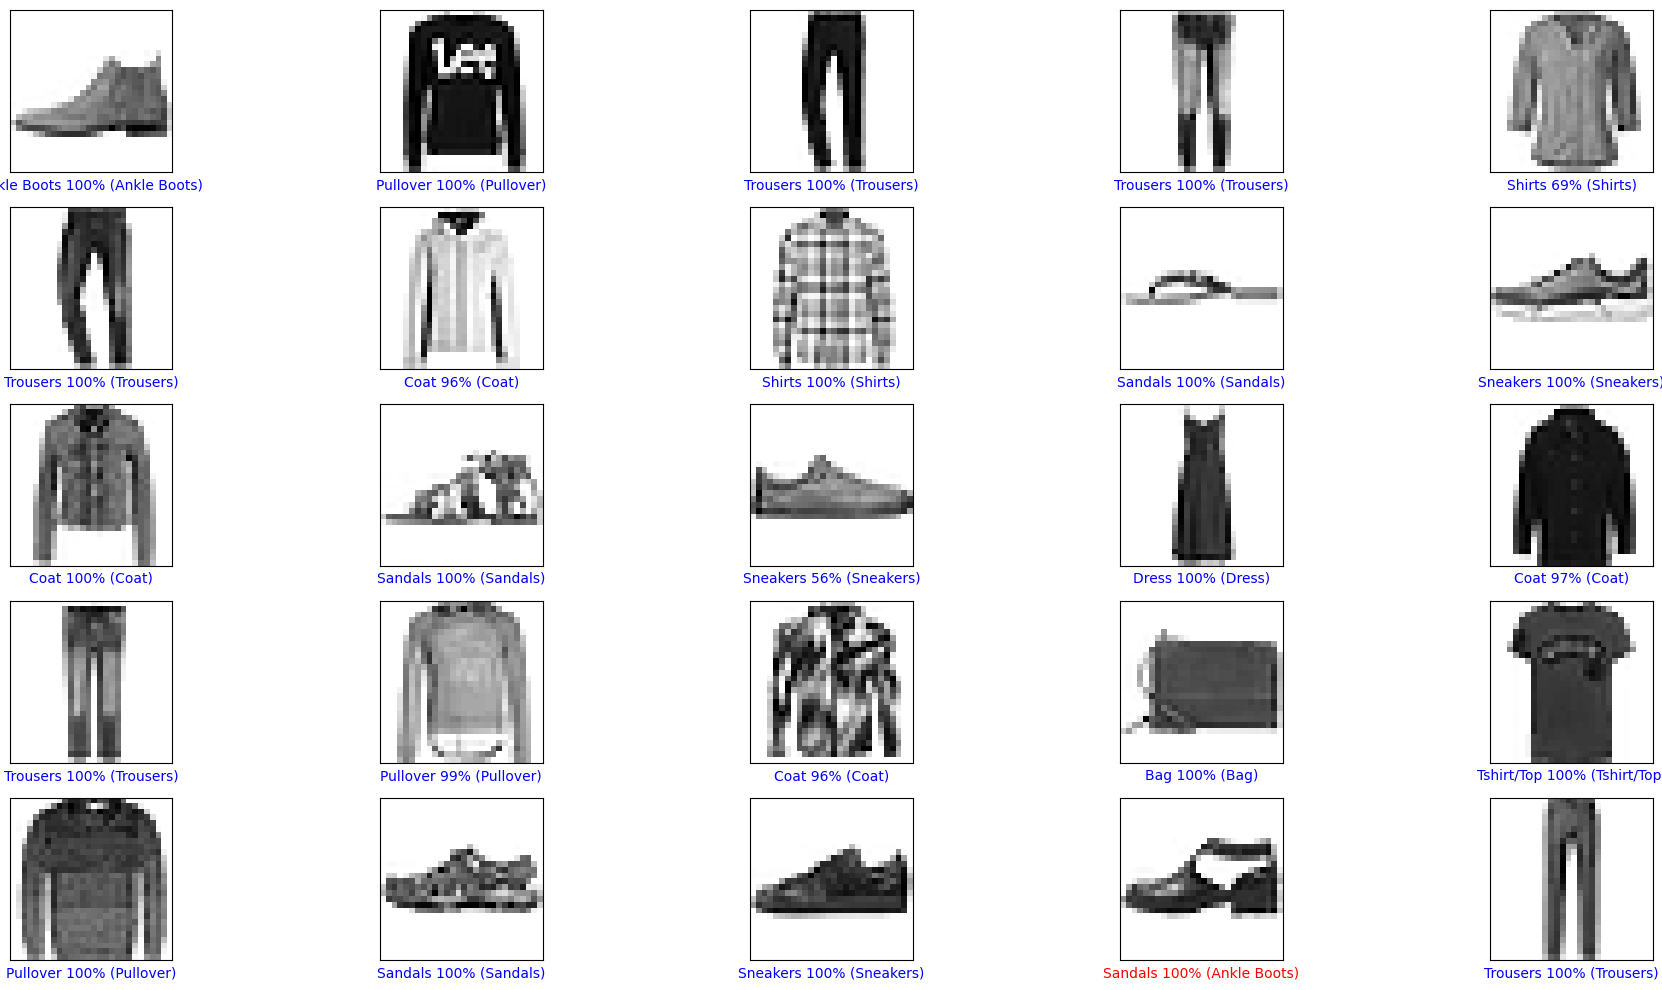

In [40]:
rows = 5
cols = 5
total_images = rows*cols

plt.figure(figsize=(2*2*cols,2*rows))

for i in range(total_images):
    plt.subplot(rows,cols,i+1)
    plot_images(i,predictions[i],test_labels,test_images)
plt.tight_layout()
plt.show()